Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: fr2119
-   **Name**: Farhan Rahman 

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# TODO Q1
url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=31928890d4c9fde9"
df = pd.read_csv(url)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [69]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540126 entries, 0 to 540125
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 539194 non-null  object 
 1   country_region                                      540126 non-null  object 
 2   sub_region_1                                        524061 non-null  object 
 3   sub_region_2                                        312427 non-null  object 
 4   iso_3166_2_code                                     195608 non-null  object 
 5   census_fips_code                                    312546 non-null  float64
 6   date                                                540126 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  416716 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   400447 non-n

In [70]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [71]:
# TODO Q4
# df['date'] = ...
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540126 entries, 0 to 540125
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 539194 non-null  object        
 1   country_region                                      540126 non-null  object        
 2   sub_region_1                                        524061 non-null  object        
 3   sub_region_2                                        312427 non-null  object        
 4   iso_3166_2_code                                     195608 non-null  object        
 5   census_fips_code                                    312546 non-null  float64       
 6   date                                                540126 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  416716 non-null  float64       

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [72]:
# TODO Q5
# df_subset =
df_subset = df[(df['country_region'].eq("Canada")) & (df['sub_region_1'].eq("Ontario")) & (df['sub_region_2'].isnull())]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 20864 to 20982
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 119 non-null    object        
 1   country_region                                      119 non-null    object        
 2   sub_region_1                                        119 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     119 non-null    object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                119 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  119 non-null    float64       
 8   groc

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [73]:
# TODO Q6
# df_subset
for i in range(7,13):
  print(df_subset.iloc[:,i].isnull().values.any()) # looping through the column with the ...percent_change_from_baseline 
  #and looking for missing data points

False
False
False
False
False
False


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

Answer: In my subset of dataframe i.e Ontario, it is evident that data points are not missing from the fields like ... percent_change_from_baseline. But while you look at states like Indiana and New York as a whole there are data points which show gap in the data, so as to maintain the differntial privacy of the user's identity. As the data collected by a particular user did not meet the threshold of maintaining a user's anonomity.These missing data points are relevant if we consider analysis for a day to day basis or only for a particular day, but since the data is collected over a period of 5 days in a week,missing few data points wont pose a great loss to the data accuracy for that particular week.

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [74]:
# TODO Q8
# days_since...
days_since_reopen = (df_subset['date'] - pd.to_datetime('2020-05-19 00:00:00')).dt.days.values
print(days_since_reopen)
# Ontario reopen phase1 , May 19 2020 https://www.ontario.ca/page/reopening-ontario-whats-each-stage#section-1
# for further reference , facilities that open include retail, construction , indoor sports etc.


[-94 -93 -92 -91 -90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77
 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59
 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41
 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23
 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5
  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  14  15  16  17  18  19  20  21  22  23  24]


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

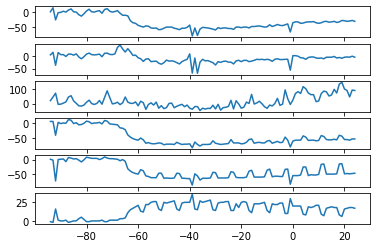

In [75]:
# TODO Q9
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(6)
axs[0].plot(days_since_reopen,df_subset.retail_and_recreation_percent_change_from_baseline)
axs[1].plot(days_since_reopen,df_subset.grocery_and_pharmacy_percent_change_from_baseline)
axs[2].plot(days_since_reopen,df_subset.parks_percent_change_from_baseline)
axs[3].plot(days_since_reopen,df_subset.transit_stations_percent_change_from_baseline)
axs[4].plot(days_since_reopen,df_subset.workplaces_percent_change_from_baseline)
axs[5].plot(days_since_reopen,df_subset.residential_percent_change_from_baseline)


**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.
Answer: The results here seems to be satisfy common sense,as it is quite reasonable to say that there will be upsurge of people visiting the parks, workplaces ,transit stations, retail and grocery stores after reopening and this claim is supported by the results in the graph above and a downward trend is observed for the resedential changes.The peaks in the graph resemble a holiday for places like the parks and other activities other than the workplace change which observes a sharp decrease.

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

Answer:

The data for mobility changes due to COVID-19 is helpful to measure the change in the mobility for certain fields. When it comes to defining the mobility of the people repective to their jobs like student the data seems to be lacking in some aspects and also when we compare the data of the visits to National parks and recreational centre there is no clear parameter that helps us to differentiate whether the number of visits to the National Park is more or the public gardens. Also no clear differentiation can be made for people who work in hospitals and grocery stores as they probably have the same amount of time they spend in the residential area. So for better analysis and sectorization a more clear and categorized data might help our cause to measure the true Mobility changes caused in different sectors due to COVID-19. 